In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

import tensorflow as tf

## 1. 단순 선형 회귀모델의 비용 구하기

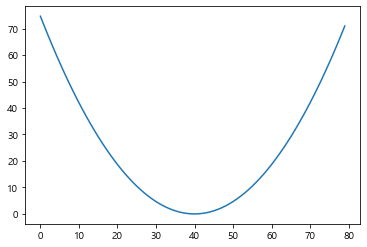

In [3]:
##### 데이터 준비
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.placeholder(tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

#----------------- 텐서플로의 그래프 완성 -------------------#

##### 비용함수를 가지고 그래프를 그려보기
sess = tf.Session()
cost_val = []

for i in range(-30, 50):
    result = sess.run(cost, feed_dict={W:i*0.1})
    cost_val.append(result)
    
plt.plot(cost_val)
sess.close()

## 2. 경사하강 알고리즘을 이용한 가중치 학습

In [10]:
##### 데이터 준비
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

##### 최저비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
gradient = tf.reduce_mean((hypot-y_train)*x_train)
learning_rate = 0.1
descent = W - (learning_rate * gradient)
update = W.assign(descent)

################## Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(20):
    _, weight, c = sess.run([update, W, cost])
    print(step, weight, c)

sess.close()

0 [0.27586097] 14.645836
1 [0.716216] 4.1927357
2 [0.95107204] 1.2194095
3 [1.0763285] 0.37366343
4 [1.1431321] 0.13309582
5 [1.1787606] 0.06466757
6 [1.1977625] 0.04520355
7 [1.2078968] 0.039667137
8 [1.2133018] 0.03809234
9 [1.2161844] 0.0376444
10 [1.2177218] 0.037516978
11 [1.2185419] 0.037480723
12 [1.2189791] 0.037470426
13 [1.2192123] 0.03746749
14 [1.2193367] 0.037466656
15 [1.219403] 0.037466418
16 [1.2194384] 0.03746635
17 [1.2194574] 0.03746632
18 [1.2194674] 0.03746633
19 [1.2194728] 0.03746633


In [12]:
##### 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

##### 최저비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
gradient = tf.reduce_mean((hypot-y_train)*x_train)
learning_rate = 0.01
descent = W - (learning_rate * gradient)
update = W.assign(descent)

################## Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(20):
    _, weight, c = sess.run([update, W, cost], feed_dict={x_train:[1, 2, 3, 4, 5], 
                                                          y_train:[1, 2, 3, 4, 5]})
    print(step, weight, c)

sess.close()

0 [0.20633665] 12.806427
1 [0.31169778] 10.157667
2 [0.40546918] 8.059584
3 [0.48892573] 6.3976927
4 [0.5632021] 5.081309
5 [0.629308] 4.0386004
6 [0.68814224] 3.2126718
7 [0.74050474] 2.5584538
8 [0.7871074] 2.0402474
9 [0.8285838] 1.629776
10 [0.8654977] 1.3046412
11 [0.89835113] 1.0471027
12 [0.92759067] 0.84310615
13 [0.9536139] 0.68152034
14 [0.9767745] 0.55352825
15 [0.99738747] 0.45214587
16 [1.015733] 0.3718408
17 [1.0320605] 0.30823126
18 [1.046592] 0.25784612
19 [1.059525] 0.21793607


#### 1) 경사 하강 알고리즘 객체 사용

In [39]:
##### 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

##### 최저비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

################## Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2000):
    _, weight, c, bias = sess.run([update, W, cost, b], feed_dict={x_train:[1, 2, 3, 4, 5], 
                                                          y_train:[2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 100 == 0:
        print(step, weight, c, bias)


0 [0.28346822] 18.880089 [0.08433424]
100 [1.1498294] 0.05362155 [0.5590683]
200 [1.1067863] 0.027238036 [0.71446794]
300 [1.0761085] 0.013836039 [0.82522416]
400 [1.0542439] 0.0070282533 [0.90416217]
500 [1.0386606] 0.0035701215 [0.9604227]
600 [1.0275542] 0.0018135123 [1.0005206]
700 [1.0196383] 0.0009212078 [1.0290991]
800 [1.0139966] 0.00046794157 [1.0494677]
900 [1.0099754] 0.00023769704 [1.0639848]
1000 [1.0071098] 0.000120743585 [1.0743313]
1100 [1.0050673] 6.133607e-05 [1.081705]
1200 [1.0036116] 3.115635e-05 [1.086961]
1300 [1.002574] 1.5825924e-05 [1.090707]
1400 [1.0018346] 8.039186e-06 [1.0933765]
1500 [1.0013076] 4.0839504e-06 [1.0952793]
1600 [1.000932] 2.0748303e-06 [1.0966351]
1700 [1.0006644] 1.0541992e-06 [1.0976015]
1800 [1.0004735] 5.3563923e-07 [1.0982903]
1900 [1.0003376] 2.7214963e-07 [1.0987811]


In [40]:
##### Testing

print(sess.run(hypot, feed_dict={x_train:[27]}))
print(sess.run(hypot, feed_dict={x_train:[2.5, 3.7]}))

[28.105652]
[3.599732 4.800022]


In [41]:
sess.close()

## 3. 응용 예제

+ 아래의 데이터를 가지고 하루 8시간을 일했을 때 매출액이 얼마인지 예측하시오.

In [42]:
X = [1, 2, 3, 4, 5, 6, 7]
y = [25000, 55000, 75000, 110000, 128000, 155000, 180000]

In [53]:
##### 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

##### 최저비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

################## Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2000):
    _, c = sess.run([update, cost], feed_dict={x_train:X, y_train:y})
    
    if step % 100 == 0:
        print(step, c)


0 13454615000.0
100 9834326.0
200 9188806.0
300 8890047.0
400 8751783.0
500 8687786.0
600 8658156.0
700 8644457.0
800 8638122.0
900 8635182.0
1000 8633825.0
1100 8633198.0
1200 8632910.0
1300 8632769.0
1400 8632706.0
1500 8632674.0
1600 8632659.0
1700 8632660.0
1800 8632654.0
1900 8632652.0


In [54]:
print(sess.run(hypot, feed_dict={x_train:[8]}))

[206570.42]


## 4. 다중 선형 회귀모델

In [19]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

#### 1) 단순하게 처리하는 경우

In [20]:
X1 = tf.placeholder(tf.float32, shape=[None])
X2 = tf.placeholder(tf.float32, shape=[None])
X3 = tf.placeholder(tf.float32, shape=[None])

y = tf.placeholder(tf.float32, shape=[None])

##### 가설 설정 : y = W1X1 + W2X2 + W3X3 + b
W1 = tf.Variable(tf.random_normal([1]))
W2 = tf.Variable(tf.random_normal([1]))
W3 = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

hypot = W1*X1 + W2*X2 + W3*X3 + b

##### 비용 함수
cost = tf.reduce_mean(tf.square((hypot - y)))

##### 최소 비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=0.000001).minimize(cost)

In [21]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(5000):
    _, c, h = sess.run([train, cost, hypot], feed_dict={X1:x1_data, X2:x2_data, X3:x3_data, y:y_data})
    
    if step % 500 == 0:
        print(step, c, h)

0 5400.1167 [ 83.83698 107.75762 102.38859 113.57444  82.24635]
500 2.5598214 [149.04585 186.09492 179.59615 197.64624 141.99272]
1000 2.5299983 [149.06628 186.08105 179.60269 197.6481  141.97697]
1500 2.5008607 [149.08653 186.06743 179.60924 197.64998 141.96152]
2000 2.4724176 [149.10663 186.05412 179.61586 197.65193 141.94641]
2500 2.444752 [149.12642 186.04099 179.62236 197.65388 141.93147]
3000 2.4177597 [149.1459  186.02798 179.62871 197.65572 141.91673]
3500 2.3914084 [149.16507 186.01506 179.63492 197.65741 141.90216]
4000 2.365638 [149.184   186.0023  179.64105 197.65901 141.8878 ]
4500 2.340449 [149.20271 185.98967 179.64711 197.66057 141.87364]


In [22]:
sess.close()

#### 2) Matrix로 처리하는 경우

In [27]:
X_data = [[73., 80., 75.],
         [93., 88., 93.],
         [89., 91., 90.],
         [96., 98., 100.],
         [73., 66., 70.]]

y_data = [[152.], 
          [185.], 
          [180.], 
          [196.], 
          [142.]]

In [28]:
X = tf.placeholder(tf.float32, shape=[None, 3])
y = tf.placeholder(tf.float32, shape=[None, 1])

##### 가설 설정 
W = tf.Variable(tf.random_normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))

hypot = tf.matmul(X, W) + b

##### 비용 함수
cost = tf.reduce_mean(tf.square((hypot - y)))

##### 최소 비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=0.000001).minimize(cost)

In [30]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(9000):
    _, c, h = sess.run([train, cost, hypot], feed_dict={X:X_data, y:y_data})
    
    if step % 1000 == 0:
        print(step, c, h)
        
sess.close()

0 22460.467 [[19.354876]
 [24.02852 ]
 [23.103537]
 [26.910383]
 [17.148134]]
1000 3.145681 [[152.27667]
 [183.8795 ]
 [180.56166]
 [198.37761]
 [139.09692]]
2000 3.0561223 [[152.2312 ]
 [183.91113]
 [180.5484 ]
 [198.36224]
 [139.14333]]
3000 2.9709616 [[152.18715]
 [183.94211]
 [180.53574]
 [198.34741]
 [139.18872]]
4000 2.8900123 [[152.14421]
 [183.97223]
 [180.52336]
 [198.3329 ]
 [139.23294]]
5000 2.8129466 [[152.10234]
 [184.00127]
 [180.51112]
 [198.31836]
 [139.2759 ]]
6000 2.7395997 [[152.06183]
 [184.02957]
 [180.49944]
 [198.30417]
 [139.31787]]
7000 2.669849 [[152.02252]
 [184.05722]
 [180.48819]
 [198.29044]
 [139.35889]]
8000 2.6034884 [[151.98425]
 [184.08415]
 [180.47722]
 [198.277  ]
 [139.39885]]


#### 3) 1차원 데이터를 2차원으로 코드 처리

In [ ]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

##### 데이터를 2차원으로 변환


X = tf.placeholder(tf.float32, shape=[None, 3])
y = tf.placeholder(tf.float32, shape=[None, 1])

##### 가설 설정 
W = tf.Variable(tf.random_normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))

hypot = tf.matmul(X, W) + b

##### 비용 함수
cost = tf.reduce_mean(tf.square((hypot - y)))

##### 최소 비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=0.000001).minimize(cost)

#----------------------------------------------------------------------------------

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(9000):
    _, c, h = sess.run([train, cost, hypot], feed_dict={X:X_data, y:y_data})
    
    if step % 1000 == 0:
        print(step, c, h)
        
sess.close()

In [32]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

X_data = np.dstack([x1_data, x2_data, x3_data])[0]
y_data = np.array(y_data).reshape(-1, 1)

X_data
y_data

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.]])

In [38]:
# X_data = list([x1_data, x2_data, x3_data])
# X_data

X_data = []
for i in zip(x1_data, x2_data, x3_data):
    X_data.append(list(i))
    
X_data

y_data = np.reshape(y_data, (-1, 1))

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.]])

In [39]:
x_data = pd.DataFrame(zip(x1_data, x2_data, x3_data)).values
x_data

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.]])

In [40]:
datas = np.reshape([x1_data, x2_data, x3_data], (3, 5)).T
datas

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.]])

In [42]:
sess = tf.Session()
tf.stack([x1_data, x2_data, x3_data],axis=1).eval(session=sess)

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.]], dtype=float32)

## 5. 대용량 데이터 처리

### (1) DASK

+ 가상의 데이터 프레임
+ 병렬처리용 작업 스케줄러

In [114]:
%%writefile "data/sample1.csv"
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three
4, 4.44, four
5, 5.55, five
6, 6.66, six

Overwriting data/sample1.csv


In [45]:
df1 = pd.read_csv("data/sample1.csv")
df1

df1[" c2"].mean()

2.22

In [46]:
import dask.dataframe as dd

In [83]:
df2 = dd.read_csv("data/sample1.csv")
df2

,c1,c2,c3
npartitions=1,,,
,int64,float64,object
,...,...,...


In [50]:
df2.head()

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three
3,4,4.44,four
4,5,5.55,five


In [53]:
df2[" c2"].mean().compute()

3.8850000000000002

In [56]:
# 변경
df2[" c2"] = 100
df2.head()

# 추가
df2["c4"] = 200
df2.head()

,c1,c2,c3,c4
0,1,100,one,200
1,2,100,two,200
2,3,100,three,200
3,4,100,four,200
4,5,100,five,200


In [57]:
df2

,c1,c2,c3,c4
npartitions=1,,,,
,int64,int64,object,int64
,...,...,...,...


In [60]:
df3 = dd.read_csv("data/crime.csv", dtype=str, error_bad_lines=False, warn_bad_lines=False)
df3

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
npartitions=29,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [63]:
df3.head()
df3.tail()
df3.count().compute()

ID                            6954279
Case Number                   6954275
Date                          6954279
Block                         6954279
IUCR                          6954279
Primary Type                  6954279
Description                   6954279
Location Description          6948835
Arrest                        6954279
Domestic                      6954279
Beat                          6954279
District                      6954232
Ward                          6339453
Community Area                6340784
FBI Code                      6954279
X Coordinate                  6888372
Y Coordinate                  6888372
Year                          6954279
Updated On                    6954279
Latitude                      6888372
Longitude                     6888372
Location                      6888372
Historical Wards 2003-2015    6868367
Zip Codes                     6888372
Community Areas               6871115
Census Tracts                 6873256
Wards       

In [64]:
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

In [65]:
%%time
df3.count().compute()

[########################################] | 100% Completed | 37.1s
Wall time: 37.1 s


ID                            6954279
Case Number                   6954275
Date                          6954279
Block                         6954279
IUCR                          6954279
Primary Type                  6954279
Description                   6954279
Location Description          6948835
Arrest                        6954279
Domestic                      6954279
Beat                          6954279
District                      6954232
Ward                          6339453
Community Area                6340784
FBI Code                      6954279
X Coordinate                  6888372
Y Coordinate                  6888372
Year                          6954279
Updated On                    6954279
Latitude                      6888372
Longitude                     6888372
Location                      6888372
Historical Wards 2003-2015    6868367
Zip Codes                     6888372
Community Areas               6871115
Census Tracts                 6873256
Wards       

In [67]:
%%time
df3.count().compute(scheduler="processes", num_workers=8)

[########################################] | 100% Completed | 29.1s
Wall time: 29.3 s


ID                            6954279
Case Number                   6954275
Date                          6954279
Block                         6954279
IUCR                          6954279
Primary Type                  6954279
Description                   6954279
Location Description          6948835
Arrest                        6954279
Domestic                      6954279
Beat                          6954279
District                      6954232
Ward                          6339453
Community Area                6340784
FBI Code                      6954279
X Coordinate                  6888372
Y Coordinate                  6888372
Year                          6954279
Updated On                    6954279
Latitude                      6888372
Longitude                     6888372
Location                      6888372
Historical Wards 2003-2015    6868367
Zip Codes                     6888372
Community Areas               6871115
Census Tracts                 6873256
Wards       

In [84]:
##### 복수 개의 데이터 처리

In [115]:
%%writefile "data/sample2.csv"
c1, c2, c3
7, 7.77, seven
8, 8.88, eight
9, 9.99, nine

Overwriting data/sample2.csv


In [87]:
df4 = dd.read_csv("data/sample*.csv")

In [88]:
df4.count().compute()

[########################################] | 100% Completed |  0.1s


c1     9
 c2    9
 c3    9
dtype: int64

### (2) QueueRunner

##### 1) 간단한 예제 1

+ enqueue_many와 dequeue

In [95]:
##### queue의 길이와 저장될 데이터 형식
q = tf.FIFOQueue(20, "float")

# enc_ops = q.enqueue_many(([1.0, 2.0, 3.0, 4.0],))
# qr = tf.train.QueueRunner(q, [enc_ops]*3)

enc_ops1 = q.enqueue_many(([1.0, 2.0, 3.0],))
enc_ops2 = q.enqueue_many(([4.0, 5.0, 6.0],))
enc_ops3 = q.enqueue_many(([7.0, 8.0, 9.0],))
qr = tf.train.QueueRunner(q, [enc_ops1, enc_ops2, enc_ops3])

sess = tf.Session()
coordi = tf.train.Coordinator()
threads = qr.create_threads(sess, coord=coordi, start=True)

for step in range(20):
    print(sess.run(q.dequeue()))

coordi.request_stop()
coordi.join(threads)
sess.close()

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
4.0
5.0
6.0
1.0
2.0
3.0
7.0
8.0
9.0
4.0
5.0


##### 2) 파일로부터 데이터 불러오기

In [116]:
# sample1, sample2 파일 불러올 때 변수명 삭제하기(c1, c2, c3)
filename_queue = tf.train.string_input_producer(["data/sample1.csv", "data/sample2.csv"],
                                               shuffle=False, name="filename_queue")

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

recored_defaults = [[0], [0.0], ["null"]]
a1, a2, a3 = tf.decode_csv(value, record_defaults=recored_defaults, field_delim=",")

In [117]:
sess = tf.Session()
coordi = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coordi)

for i in range(30):
    print(sess.run([a1, a2, a3]))
    
coordi.request_stop()
coordi.join(threads)
sess.close()

[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']
[4, 4.44, b' four']
[5, 5.55, b' five']
[6, 6.66, b' six']
[7, 7.77, b' seven']
[8, 8.88, b' eight']
[9, 9.99, b' nine']
[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']
[4, 4.44, b' four']
[5, 5.55, b' five']
[6, 6.66, b' six']
[7, 7.77, b' seven']
[8, 8.88, b' eight']
[9, 9.99, b' nine']
[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']
[4, 4.44, b' four']
[5, 5.55, b' five']
[6, 6.66, b' six']
[7, 7.77, b' seven']
[8, 8.88, b' eight']
[9, 9.99, b' nine']
[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']


##### 3) 슬라이드 소스보기

In [118]:
filename_queue = tf.train.string_input_producer(['data/data-01-test-score.csv'], shuffle=False, 
                                                name='filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

In [ ]:
"""
BATCH
-------
- Full Batch 또는 Batch : 전체 데이터
    - 샘플 전체를 계산하므로 시간이 많이 걸린다.
    - 데이터가 많을 경우(한번에 데이터를 메모리에 load하지 못하는 경우) 사용이 불가
    - 오차율이 적다.
    
- Stochastic Gradient Descent: 한 개의 데이터
    - 데이터를 한개씩 추출해서 처리해보고 이를 모든 데이터에 반복
    - 오차율이 클 수 있다.
    - 하드웨어 성능을 제대로 발휘할 수 없다.(특히 GPU)

- Mini Batch
    - 전체 훈련데이터를 배치 사이즈로 등분하여 각 배치 셋을 순차적으로 수행
    - Full Batch보다 빠르고 SGD보다 오차율도 낮다.
"""

In [ ]:
tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)